### 1 ANALISIS EXPLORATORIO DE DATOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
conditio

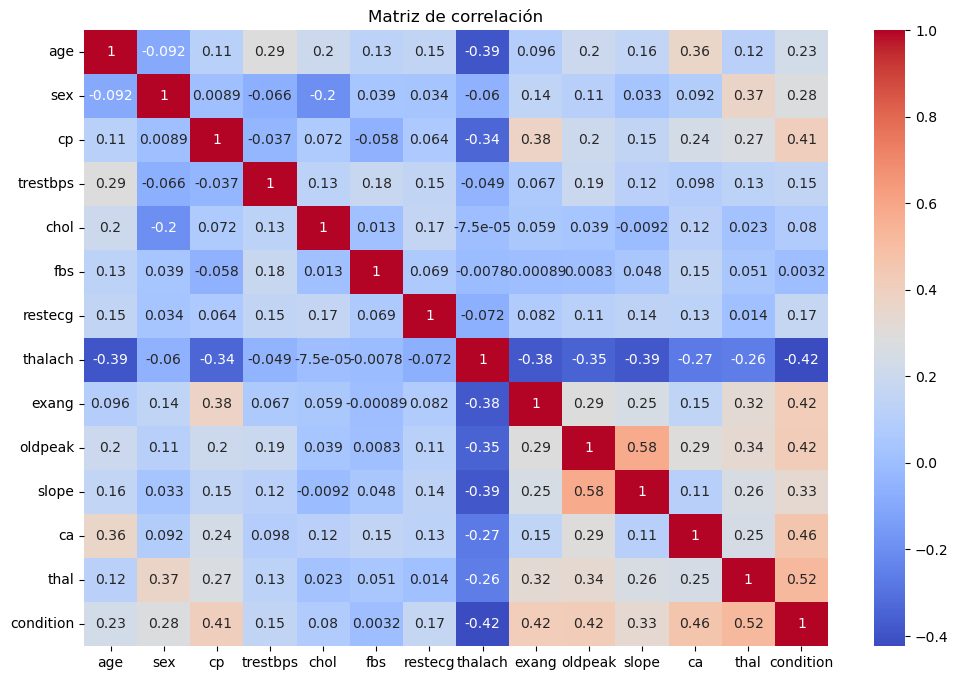

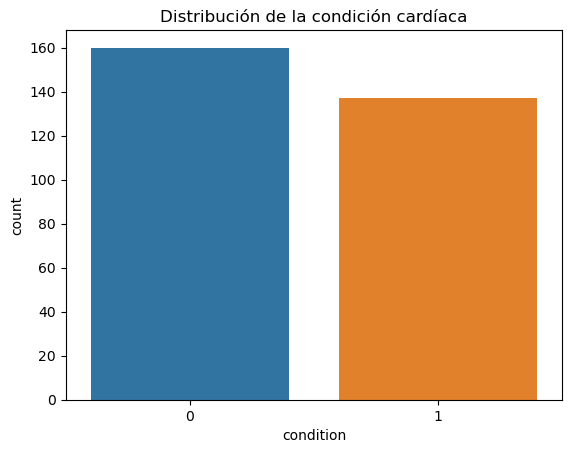

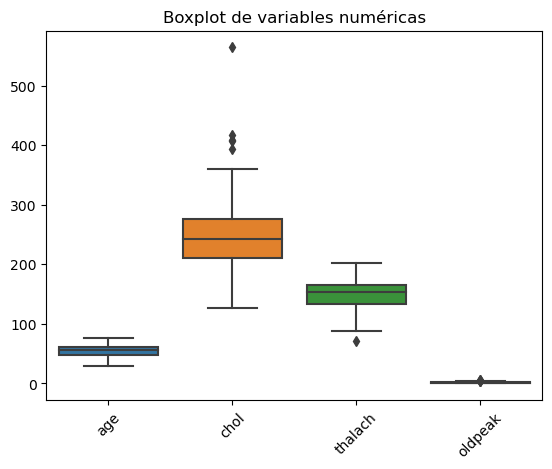

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("heart_cleveland_upload.csv")

# Ver las primeras filas
df.head()

# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()

# Comprobar valores nulos
print(df.isnull().sum())

# Ver correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Distribución de la variable objetivo
sns.countplot(x='condition', data=df)
plt.title('Distribución de la condición cardíaca')
plt.show()

# Boxplot para detectar outliers en variables relevantes
sns.boxplot(data=df[['age', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplot de variables numéricas')
plt.xticks(rotation=45)
plt.show()

### 2 PREPROCESAMIENTO

In [2]:
# Definir X (predictoras) e y (objetivo)
X = df.drop('condition', axis=1)
y = df['condition']

# Escalar variables (recomendado para regresión logística)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3 SELECCIÓN DE CARACTERISTICAS

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)

# Mostrar puntuaciones
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

     Feature       Score
12      thal  109.629171
11        ca   80.577866
9    oldpeak   64.677208
7    thalach   64.589855
8      exang   63.680253
2         cp   59.241915
10     slope   36.804300
1        sex   24.798347
0        age   16.038097
6    restecg    8.394987
3   trestbps    7.117646
4       chol    1.913800
5        fbs    0.002959


### 4 DIVIDIR EL DATASET

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 5 ENTRENAR EL MODELO

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 6 EVALUAR EL MODELO

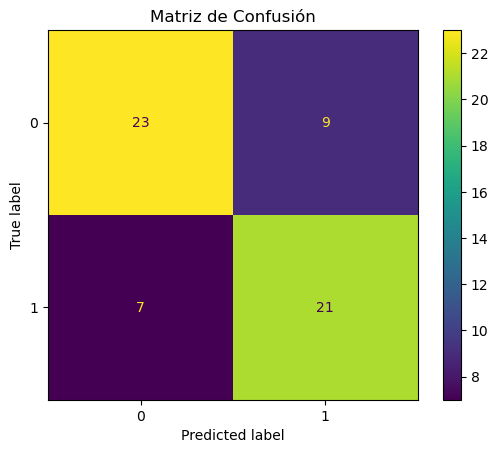

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

# Métricas detalladas
print(classification_report(y_test, y_pred))

### RESULTADOS

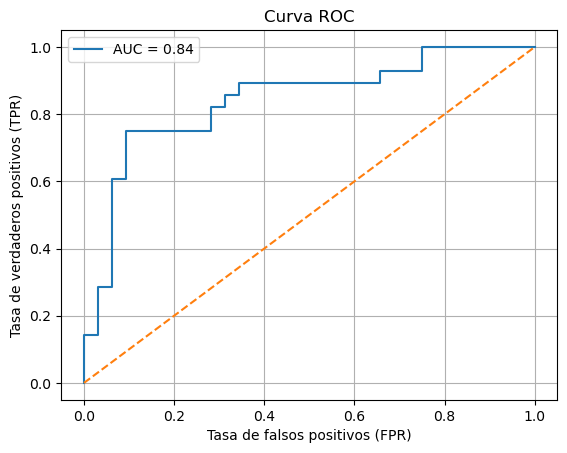

In [7]:
# Distribución de probabilidades
y_proba = model.predict_proba(X_test)[:, 1]

# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()